In [1]:
import os 
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.backend.backend())

tensorflow


In [2]:
from helper_module import WindowGenerator

In [3]:
import datetime
import IPython
import pickle
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras
import mlflow.tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
os.getcwd()
os.chdir(r"c:\\Users\\User\\OneDrive\\Desktop\\YP\\Subjects\\Capstone\\project1")
os.getcwd()

'c:\\Users\\User\\OneDrive\\Desktop\\YP\\Subjects\\Capstone\\project1'

In [5]:
CSV_PATH = os.path.join(os.getcwd(),'datasets','cases_malaysia_train.csv')
CSV_PATH_TEST = os.path.join(os.getcwd(),'datasets','cases_malaysia_test.csv')
cases_df = pd.read_csv(CSV_PATH)
test_df = pd.read_csv(CSV_PATH_TEST)
print(cases_df.head())

        date cases_new  cases_import  cases_recovered  cases_active  \
0  25/1/2020         4             4                0             4   
1  26/1/2020         0             0                0             4   
2  27/1/2020         0             0                0             4   
3  28/1/2020         0             0                0             4   
4  29/1/2020         3             3                0             7   

   cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  ...  \
0              0            4           0           0            0  ...   
1              0            0           0           0            0  ...   
2              0            0           0           0            0  ...   
3              0            0           0           0            0  ...   
4              0            3           0           0            0  ...   

   cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
0            0            0         0         

In [6]:
#removing the column date from cases_df
date_time = pd.to_datetime(cases_df.pop('date'), format='%d/%m/%Y')
date_time = pd.to_datetime(test_df.pop('date'), format='%d/%m/%Y')
print(date_time.dtype)
print(date_time.dtype)

datetime64[ns]
datetime64[ns]


In [7]:
cases_df.info()
cases_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    object 
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11               6

cases_new                    0
cases_import                 0
cases_recovered              0
cases_active                 0
cases_cluster                0
cases_unvax                  0
cases_pvax                   0
cases_fvax                   0
cases_boost                  0
cases_child                  0
cases_adolescent             0
cases_adult                  0
cases_elderly                0
cases_0_4                    0
cases_5_11                   0
cases_12_17                  0
cases_18_29                  0
cases_30_39                  0
cases_40_49                  0
cases_50_59                  0
cases_60_69                  0
cases_70_79                  0
cases_80                     0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64

In [8]:
print(cases_df[cases_df['cases_new']=="?"])
print(cases_df[cases_df['cases_new']==" "])

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
273         ?            11              671          8953            789   
427         ?             5             1257         14127            494   
445         ?             6             1485         16625            689   
446         ?            19             1259         17510            896   
587         ?            14            22399        254719           2223   
640         ?            15             5607         72903            210   

     cases_unvax  cases_pvax  cases_fvax  cases_boost  cases_child  ...  \
273         1228           0           0            0           94  ...   
427         1187          12           0            0          185  ...   
445         1869          16           4            0          181  ...   
446         2132          10           6            0          188  ...   
587         8600        4766        6012            0         2925  ...   
640       

In [9]:
cases_df = cases_df.replace('?', np.nan)
cases_df = cases_df.replace(" ", np.nan)

print(cases_df[cases_df['cases_new'].isnull()])

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
98        NaN            11              116          1747             53   
217       NaN            10                8           153              0   
273       NaN            11              671          8953            789   
279       NaN             0              491         10380            392   
287       NaN             0             1029         11646            679   
427       NaN             5             1257         14127            494   
445       NaN             6             1485         16625            689   
446       NaN            19             1259         17510            896   
476       NaN             9             3432         41914            999   
587       NaN            14            22399        254719           2223   
615       NaN            14            15891        159932            868   
640       NaN            15             5607         72903            210   

In [10]:
row_numbers = cases_df[cases_df['cases_new'].isnull()].index
print(row_numbers)

Index([98, 217, 273, 279, 287, 427, 445, 446, 476, 587, 615, 640], dtype='int64')


In [11]:
for row_num in row_numbers:
    cases_df.loc[row_num,'cases_new'] = (cases_df.loc[row_num,'cases_active']-cases_df.loc[row_num-1,'cases_active'])+cases_df.loc[row_num,'cases_recovered']

In [12]:
print(cases_df.info())
cases_df['cases_new'] = cases_df['cases_new'].astype('float64')
print(cases_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    object 
 1   cases_import             680 non-null    int64  
 2   cases_recovered          680 non-null    int64  
 3   cases_active             680 non-null    int64  
 4   cases_cluster            680 non-null    int64  
 5   cases_unvax              680 non-null    int64  
 6   cases_pvax               680 non-null    int64  
 7   cases_fvax               680 non-null    int64  
 8   cases_boost              680 non-null    int64  
 9   cases_child              680 non-null    int64  
 10  cases_adolescent         680 non-null    int64  
 11  cases_adult              680 non-null    int64  
 12  cases_elderly            680 non-null    int64  
 13  cases_0_4                680 non-null    int64  
 14  cases_5_11               6

In [13]:
print(test_df.loc[test_df['cases_new'].isnull()])
row_index = test_df.loc[test_df['cases_new'].isnull()].index
row_index = row_index[0]
print(row_index)

    cases_new  cases_import  cases_recovered  cases_active  cases_cluster  \
60        NaN           130             3968         61383            374   

    cases_unvax  cases_pvax  cases_fvax  cases_boost  cases_child  ...  \
60         1122          34        3058         1506          847  ...   

    cases_60_69  cases_70_79  cases_80  cluster_import  cluster_religious  \
60          251          102        32               0                  0   

    cluster_community  cluster_highRisk  cluster_education  \
60                  4                14                279   

    cluster_detentionCentre  cluster_workplace  
60                        4                 73  

[1 rows x 30 columns]
60


In [14]:
print(test_df.loc[row_index,'cases_new'])
test_df.loc[row_index,'cases_new'] = (test_df.loc[row_index,'cases_active']-test_df.loc[row_index-1,'cases_active'])+test_df.loc[row_index,'cases_recovered']
print(test_df.loc[row_index,'cases_new'])

nan
5713.0


In [15]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                100 non-null    float64
 1   cases_import             100 non-null    int64  
 2   cases_recovered          100 non-null    int64  
 3   cases_active             100 non-null    int64  
 4   cases_cluster            100 non-null    int64  
 5   cases_unvax              100 non-null    int64  
 6   cases_pvax               100 non-null    int64  
 7   cases_fvax               100 non-null    int64  
 8   cases_boost              100 non-null    int64  
 9   cases_child              100 non-null    int64  
 10  cases_adolescent         100 non-null    int64  
 11  cases_adult              100 non-null    int64  
 12  cases_elderly            100 non-null    int64  
 13  cases_0_4                100 non-null    int64  
 14  cases_5_11               10

In [16]:
train_case_df = cases_df.astype('float64')
test_case_df = test_df.astype('float64')

In [17]:
print(train_case_df.info())
print(test_case_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    float64
 1   cases_import             680 non-null    float64
 2   cases_recovered          680 non-null    float64
 3   cases_active             680 non-null    float64
 4   cases_cluster            680 non-null    float64
 5   cases_unvax              680 non-null    float64
 6   cases_pvax               680 non-null    float64
 7   cases_fvax               680 non-null    float64
 8   cases_boost              680 non-null    float64
 9   cases_child              680 non-null    float64
 10  cases_adolescent         680 non-null    float64
 11  cases_adult              680 non-null    float64
 12  cases_elderly            680 non-null    float64
 13  cases_0_4                680 non-null    float64
 14  cases_5_11               6

In [18]:
train_case_df_copy = train_case_df.copy()
test_case_df_copy = test_case_df.copy()
train_date_time = train_case_df_copy.index  
test_date_time = test_case_df_copy.index  

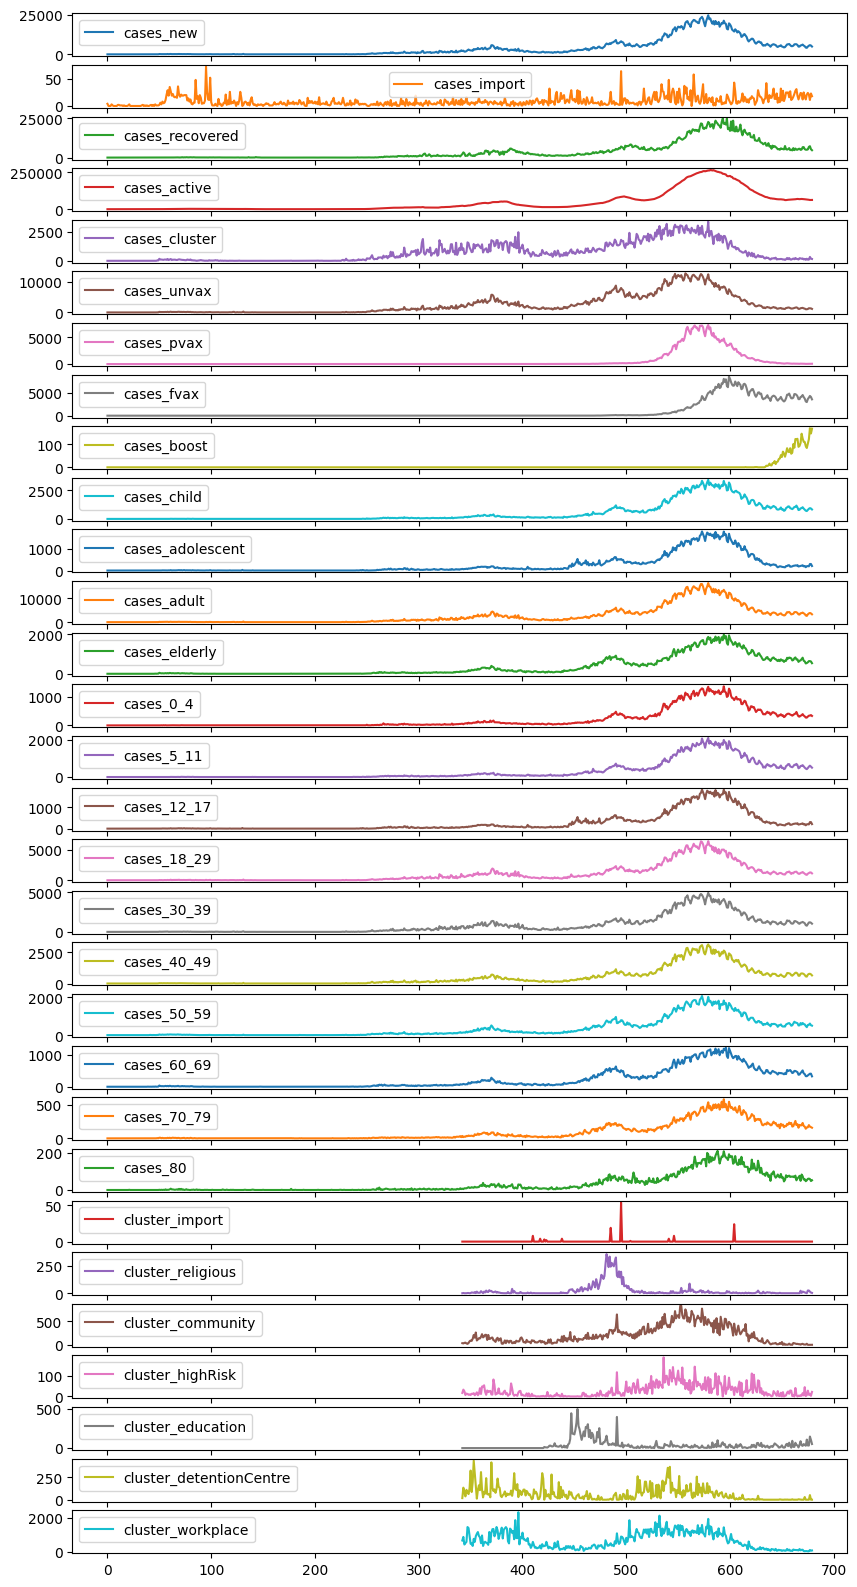

In [19]:
train_case_df_copy.plot(subplots=True,figsize=(10,20))
plt.show()

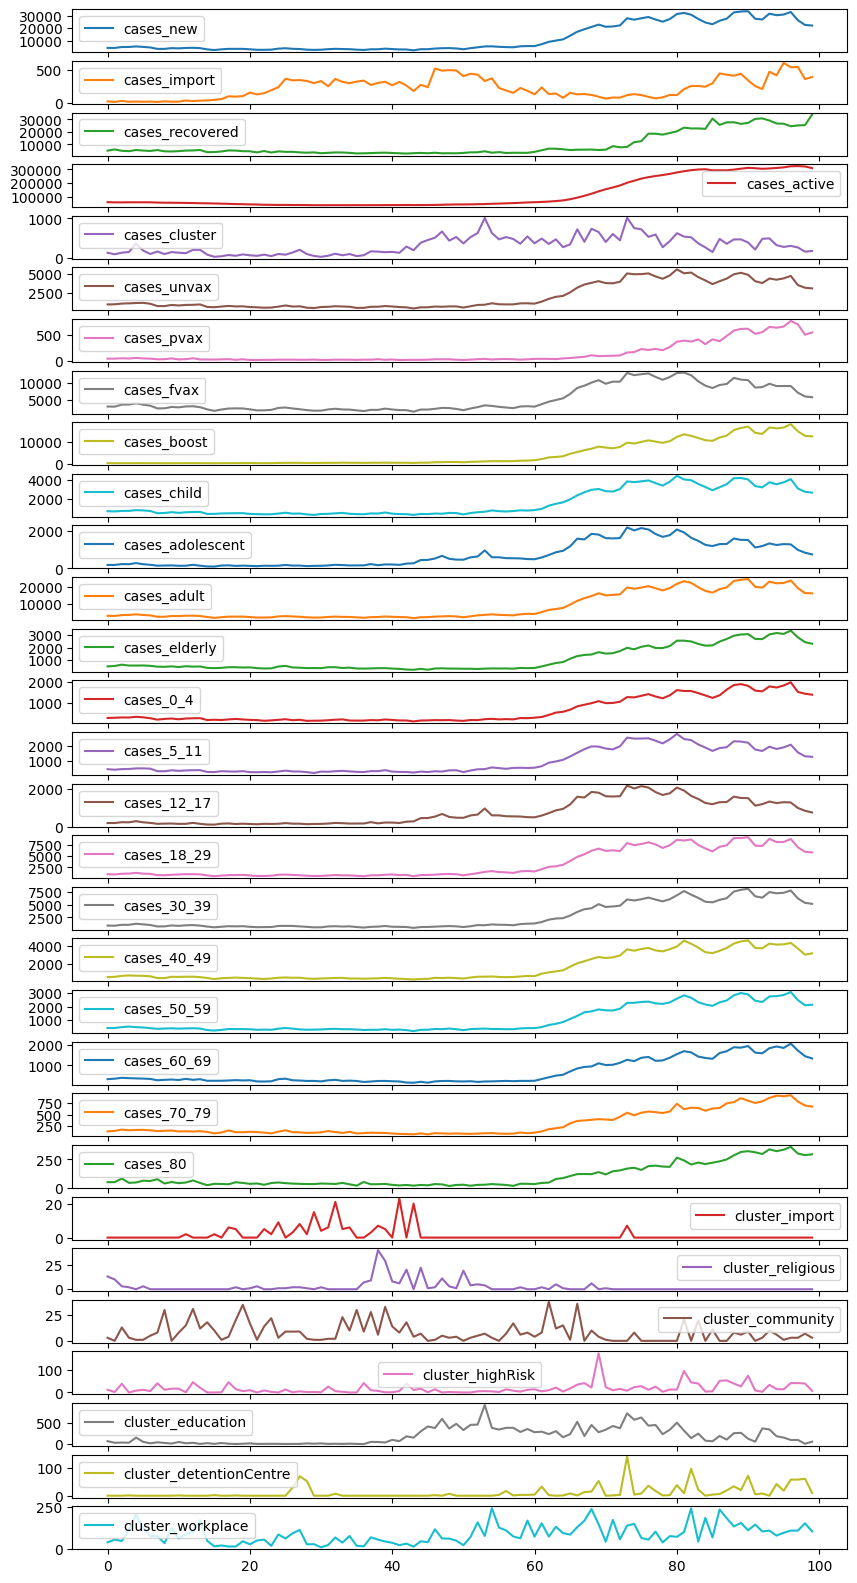

In [20]:
test_case_df_copy.plot(subplots=True,figsize=(10,20))
plt.show()

In [21]:
# [Data Splitting] split out the dataset accordingly to split ratio to prevent the data from shuffled using 
# functions such as train_test_split
data_size = test_df.shape[0]
val_ratio = 0.5
test_ratio = 0.5

val_size = int(data_size * val_ratio)
test_size = data_size - val_size

train_df = train_case_df
val_df = test_df.iloc[:val_size]
test_df = test_df.iloc[val_size:]

print("Validation set size:",len(val_df))
print("Test set size:",len(test_df))
print("Training set size:",len(cases_df))

Validation set size: 50
Test set size: 50
Training set size: 680


In [22]:
#Filling up Nan values in columns_to_fill with '0'
columns_to_fill = [
    'cluster_import', 'cluster_religious', 'cluster_community',
    'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre', 'cluster_workplace'
]
train_df[columns_to_fill] = train_df[columns_to_fill].fillna(0)
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cases_new                680 non-null    float64
 1   cases_import             680 non-null    float64
 2   cases_recovered          680 non-null    float64
 3   cases_active             680 non-null    float64
 4   cases_cluster            680 non-null    float64
 5   cases_unvax              680 non-null    float64
 6   cases_pvax               680 non-null    float64
 7   cases_fvax               680 non-null    float64
 8   cases_boost              680 non-null    float64
 9   cases_child              680 non-null    float64
 10  cases_adolescent         680 non-null    float64
 11  cases_adult              680 non-null    float64
 12  cases_elderly            680 non-null    float64
 13  cases_0_4                680 non-null    float64
 14  cases_5_11               6

In [23]:
# [Data normalization] Perform this step using pandas way
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

TensorSpec(shape=(None, 30, 1), dtype=tf.float32, name=None)


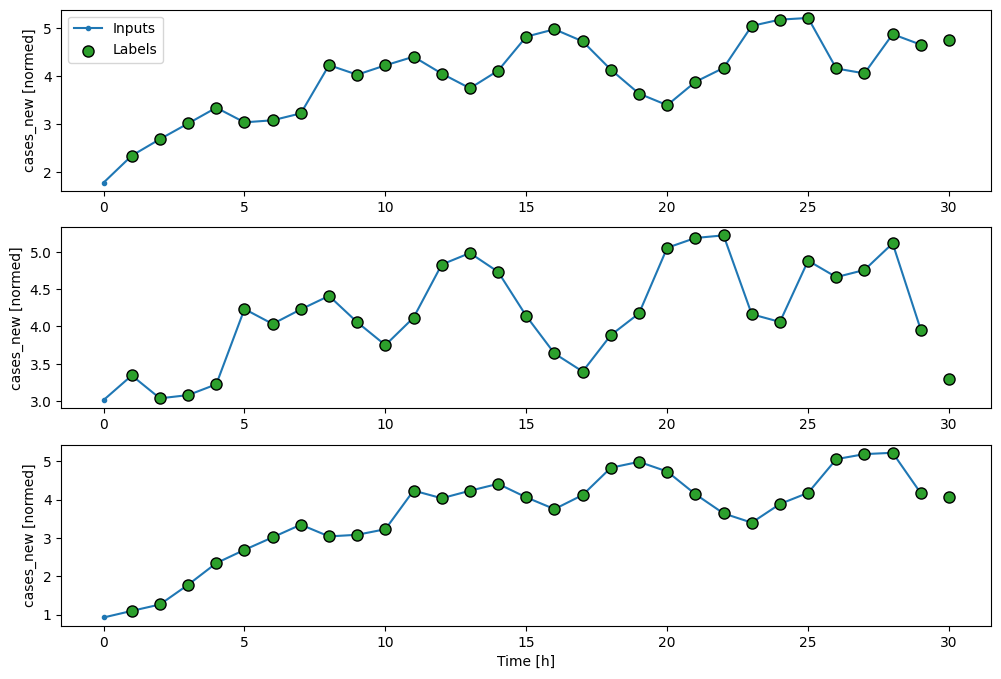

In [ ]:
#This is a single-step single-output problem. With an input window width of 30, 
#output window width of 30 and an offset of 1.
single_window = WindowGenerator(input_width=30,
                                   label_width=30,
                                   shift = 1,
                                   train_df =train_df,
                                   val_df =val_df,
                                   test_df =test_df,
                                   label_columns=["cases_new"])
single_window.plot(plot_col="cases_new")
print(single_window.train.element_spec[1])

In [25]:
# [MLOps] Create MLFlow experiment
mlflow.set_experiment("Capstone Covid19")

<Experiment: artifact_location='file:///c:/Users/User/OneDrive/Desktop/YP/Subjects/Capstone/project1/mlruns/760769868663042674', creation_time=1736431451810, experiment_id='760769868663042674', last_update_time=1736431451810, lifecycle_stage='active', name='Capstone Covid19', tags={}>

In [26]:
model_single_32 = keras.Sequential()
model_single_32.add(keras.layers.LSTM(32,activation='relu',return_sequences=True))
model_single_32.add(keras.layers.Dense(1))
model_single_32.summary()

model_single_32.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model_single_64 = keras.Sequential()
model_single_64.add(keras.layers.LSTM(64,activation='relu',return_sequences=True))
model_single_64.add(keras.layers.Dense(1))
model_single_64.summary()

model_single_64.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
model_single_128 = keras.Sequential()
model_single_128.add(keras.layers.LSTM(128,activation='relu',return_sequences=True))
model_single_128.add(keras.layers.Dense(1))
model_single_128.summary()

model_single_128.compile(optimizer='adam',loss='mse',metrics=['mae'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Create the single time step model
model_single_256 = keras.Sequential()
model_single_256.add(keras.layers.LSTM(256,activation='relu',return_sequences=True))
model_single_256.add(keras.layers.Dense(1))
model_single_256.summary()
model_single_256.compile(optimizer='adamw',loss='mse',metrics=['mae'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# train the model 
MAX_EPOCH = 70

In [31]:
with mlflow.start_run(run_name="lstm_32") as run:
    mlflow.tensorflow.autolog()
    history_32 = model_single_32.fit(single_window.train,validation_data=single_window.val,epochs=MAX_EPOCH)

2025/01/10 08:40:02 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential' has no defined input shape yet.


Epoch 1/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8434 - mae: 0.7798

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.8193 - mae: 0.7653 - val_loss: 63.7020 - val_mae: 4.9485
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1045 - mae: 0.2282

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1046 - mae: 0.2291 - val_loss: 41.3419 - val_mae: 4.0420
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0685 - mae: 0.1711

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0677 - mae: 0.1698 - val_loss: 22.9724 - val_mae: 3.0441
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0508 - mae: 0.1438 - val_loss: 23.0387 - val_mae: 3.0628
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0395 - mae: 0.1268 - val_loss: 25.0489 - val_mae: 3.2087
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0355 - mae: 0.1225 - val_loss: 29.0440 - val_mae: 3.4347
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0292 - mae: 0.1066 - val_loss: 32.5556 - val_mae: 3.5879
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0270 - mae: 0.1048 - val_loss: 35.9078 - val_mae: 3.7127
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0244 - mae: 0.1006 - val_loss: 38.6419 - val_mae: 3.7840
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0233 - mae: 0.0949 - val_loss: 40.4090 - val_mae: 3.8230
Epoch 11/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0215

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0057 - mae: 0.0473 - val_loss: 22.5783 - val_mae: 2.9318
Epoch 55/70
 6/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - mae: 0.0471

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0055 - mae: 0.0466 - val_loss: 21.7918 - val_mae: 2.8955
Epoch 56/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0052 - mae: 0.0455

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0052 - mae: 0.0455 - val_loss: 20.6890 - val_mae: 2.8210
Epoch 57/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0053 - mae: 0.0449

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0053 - mae: 0.0450 - val_loss: 19.6216 - val_mae: 2.7531
Epoch 58/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - mae: 0.0458

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0053 - mae: 0.0456 - val_loss: 18.6953 - val_mae: 2.6927
Epoch 59/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0051 - mae: 0.0449

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0051 - mae: 0.0449 - val_loss: 17.7509 - val_mae: 2.6263
Epoch 60/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - mae: 0.0433

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0049 - mae: 0.0436 - val_loss: 17.1984 - val_mae: 2.5891
Epoch 61/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - mae: 0.0462

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0053 - mae: 0.0459 - val_loss: 16.1744 - val_mae: 2.5169
Epoch 62/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0052 - mae: 0.0454

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0052 - mae: 0.0454 - val_loss: 15.5451 - val_mae: 2.4638
Epoch 63/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - mae: 0.0423

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0047 - mae: 0.0425 - val_loss: 15.0976 - val_mae: 2.4288
Epoch 64/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - mae: 0.0433

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0048 - mae: 0.0433 - val_loss: 13.6898 - val_mae: 2.3234
Epoch 65/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0048 - mae: 0.0433

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0048 - mae: 0.0433 - val_loss: 12.8698 - val_mae: 2.2617
Epoch 66/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050 - mae: 0.0442

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0049 - mae: 0.0440 - val_loss: 12.5742 - val_mae: 2.2333
Epoch 67/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mae: 0.0409

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0045 - mae: 0.0413 - val_loss: 11.4668 - val_mae: 2.1448
Epoch 68/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0047 - mae: 0.0428

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0046 - mae: 0.0427 - val_loss: 10.6270 - val_mae: 2.0751
Epoch 69/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0048 - mae: 0.0436

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0047 - mae: 0.0433 - val_loss: 9.8304 - val_mae: 2.0017
Epoch 70/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042 - mae: 0.0405

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0043 - mae: 0.0407 - val_loss: 8.9803 - val_mae: 1.9254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


In [32]:
with mlflow.start_run(run_name="lstm_64") as run:
    mlflow.tensorflow.autolog()
    history_64 = model_single_64.fit(single_window.train,validation_data=single_window.val,epochs=MAX_EPOCH)

2025/01/10 08:40:55 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_1' has no defined input shape yet.


Epoch 1/70
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1704 - mae: 0.2985

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.1532 - mae: 0.2782 - val_loss: 62.1911 - val_mae: 4.0505
Epoch 2/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0577 - mae: 0.1491

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0567 - mae: 0.1482 - val_loss: 44.4519 - val_mae: 3.5719
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0396 - mae: 0.1249 - val_loss: 60.2537 - val_mae: 4.5513
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0287 - mae: 0.1010 - val_loss: 62.4511 - val_mae: 4.7675
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0215 - mae: 0.0921 - val_loss: 59.5719 - val_mae: 4.6833
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0187 - mae: 0.0829 - val_loss: 59.8287 - val_mae: 4.7473
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0155 - mae: 0.0776 - val_loss: 62.9502 - val_mae: 4.9390
Epoch 8/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140 - mae: 0.0743 - val_loss: 62.1845 - val_mae: 4.9237
Epoch 9/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0121 - mae: 0.0709 - val_loss: 60.3453 - val_mae: 4.8455
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0117 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0112 - mae: 0.0680 - val_loss: 42.1646 - val_mae: 3.9745
Epoch 14/70
 7/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mae: 0.0700

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0111 - mae: 0.0678 - val_loss: 39.9614 - val_mae: 3.8907
Epoch 15/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0097 - mae: 0.0640

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0097 - mae: 0.0636 - val_loss: 35.3851 - val_mae: 3.6378
Epoch 16/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mae: 0.0618

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0094 - mae: 0.0617 - val_loss: 32.1524 - val_mae: 3.4573
Epoch 17/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mae: 0.0591

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0087 - mae: 0.0593 - val_loss: 28.0981 - val_mae: 3.2464
Epoch 18/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mae: 0.0578

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0081 - mae: 0.0579 - val_loss: 25.7338 - val_mae: 3.1508
Epoch 19/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081 - mae: 0.0578

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0081 - mae: 0.0576 - val_loss: 20.3892 - val_mae: 2.8591
Epoch 20/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0080 - mae: 0.0564

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0080 - mae: 0.0563 - val_loss: 14.9844 - val_mae: 2.5399
Epoch 21/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mae: 0.0523

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0070 - mae: 0.0527 - val_loss: 9.7498 - val_mae: 2.2102
Epoch 22/70
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0079 - mae: 0.0560

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - mae: 0.0552 - val_loss: 7.1200 - val_mae: 1.9597
Epoch 23/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068 - mae: 0.0514

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0068 - mae: 0.0517 - val_loss: 6.4156 - val_mae: 1.8770
Epoch 24/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063 - mae: 0.0511

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0064 - mae: 0.0512 - val_loss: 6.0138 - val_mae: 1.8192
Epoch 25/70
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0063 - mae: 0.0514

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0062 - mae: 0.0509 - val_loss: 5.3602 - val_mae: 1.7246
Epoch 26/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0054 - mae: 0.0470

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0055 - mae: 0.0476 - val_loss: 4.6285 - val_mae: 1.5977
Epoch 27/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0057 - mae: 0.0486

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0058 - mae: 0.0488 - val_loss: 4.1903 - val_mae: 1.5260
Epoch 28/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0054 - mae: 0.0475

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0054 - mae: 0.0476 - val_loss: 3.2270 - val_mae: 1.3068
Epoch 29/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mae: 0.0474

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0053 - mae: 0.0471 - val_loss: 2.5473 - val_mae: 1.1270
Epoch 30/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mae: 0.0477

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0053 - mae: 0.0473 - val_loss: 2.2135 - val_mae: 1.0269
Epoch 31/70
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0050 - mae: 0.0456

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0050 - mae: 0.0453 - val_loss: 2.1224 - val_mae: 0.9894
Epoch 32/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0049 - mae: 0.0451 - val_loss: 2.1590 - val_mae: 0.9813
Epoch 33/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - mae: 0.0423 - val_loss: 2.2109 - val_mae: 0.9802
Epoch 34/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - mae: 0.0404 - val_loss: 5.8274 - val_mae: 1.1919
Epoch 35/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0044 - mae: 0.0420 - val_loss: 10.2492 - val_mae: 1.4498
Epoch 36/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0049 - mae: 0.0440 - val_loss: 15.3492 - val_mae: 1.6787
Epoch 37/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0054 - mae: 0.0455 - val_loss: 11.2551 - val_mae: 1.4900
Epoch 38/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047 - mae: 0.0442 - val_loss: 9.3221 - val_mae: 1.3816
Epoch 39/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.004

In [33]:
with mlflow.start_run(run_name="lstm_128") as run:
    mlflow.tensorflow.autolog()
    history_128 = model_single_128.fit(single_window.train,validation_data=single_window.val,epochs=MAX_EPOCH)

2025/01/10 08:41:43 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_2' has no defined input shape yet.


Epoch 1/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.6554 - mae: 0.5161

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.5762 - mae: 0.4765 - val_loss: 14.7802 - val_mae: 1.9396
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0695 - mae: 0.1609 - val_loss: 59.3262 - val_mae: 3.6418
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0491 - mae: 0.1314 - val_loss: 37.4360 - val_mae: 3.1478
Epoch 4/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0312 - mae: 0.0997

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0315 - mae: 0.0999 - val_loss: 12.2800 - val_mae: 1.9598
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0262 - mae: 0.0918 - val_loss: 14.7157 - val_mae: 2.0296
Epoch 6/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0227 - mae: 0.0841

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0226 - mae: 0.0841 - val_loss: 9.8947 - val_mae: 1.6437
Epoch 7/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0214 - mae: 0.0842

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0208 - mae: 0.0833 - val_loss: 8.9905 - val_mae: 1.5118
Epoch 8/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0167 - mae: 0.0783

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0166 - mae: 0.0782 - val_loss: 5.3423 - val_mae: 1.1891
Epoch 9/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0152 - mae: 0.0760

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0150 - mae: 0.0758 - val_loss: 3.5675 - val_mae: 1.0049
Epoch 10/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0141 - mae: 0.0735

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0139 - mae: 0.0732 - val_loss: 3.4595 - val_mae: 0.9999
Epoch 11/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124 - mae: 0.0704

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0124 - mae: 0.0703 - val_loss: 2.7804 - val_mae: 0.9016
Epoch 12/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0112 - mae: 0.0670

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0112 - mae: 0.0670 - val_loss: 1.2767 - val_mae: 0.6290
Epoch 13/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0099 - mae: 0.0622

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0100 - mae: 0.0626 - val_loss: 1.2515 - val_mae: 0.6394
Epoch 14/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0102 - mae: 0.0639

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0101 - mae: 0.0635 - val_loss: 0.8009 - val_mae: 0.5438
Epoch 15/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0094 - mae: 0.0611

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0094 - mae: 0.0609 - val_loss: 0.5887 - val_mae: 0.4785
Epoch 16/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0096 - mae: 0.0620

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0094 - mae: 0.0611 - val_loss: 0.5459 - val_mae: 0.4642
Epoch 17/70
 9/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0085 - mae: 0.0575

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0084 - mae: 0.0573 - val_loss: 0.4435 - val_mae: 0.4175
Epoch 18/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0075 - mae: 0.0540 - val_loss: 0.4962 - val_mae: 0.4409
Epoch 19/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0080 - mae: 0.0558 - val_loss: 0.6472 - val_mae: 0.4877
Epoch 20/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0082 - mae: 0.0570 - val_loss: 0.8906 - val_mae: 0.5739
Epoch 21/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0068 - mae: 0.0511 - val_loss: 1.1025 - val_mae: 0.6419
Epoch 22/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0072 - mae: 0.0535 - val_loss: 1.8697 - val_mae: 0.8648
Epoch 23/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0063 - mae: 0.0497 - val_loss: 1.6266 - val_mae: 0.7617
Epoch 24/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0059 - mae: 0.0486 - val_loss: 2.8694 - val_mae: 1.0590
Epoch 25/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0055 -

In [34]:
with mlflow.start_run(run_name="lstm_256") as run:
    mlflow.tensorflow.autolog()
    history_256 = model_single_256.fit(single_window.train,validation_data=single_window.val,epochs=MAX_EPOCH)

2025/01/10 08:42:40 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: Sequential model 'sequential_3' has no defined input shape yet.


Epoch 1/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3559 - mae: 0.4461

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 0.3283 - mae: 0.4213 - val_loss: 0.1335 - val_mae: 0.2107
Epoch 2/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0537 - mae: 0.1484 - val_loss: 2.0926 - val_mae: 1.0279
Epoch 3/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0326 - mae: 0.1178 - val_loss: 0.3037 - val_mae: 0.4269
Epoch 4/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0234 - mae: 0.0954 - val_loss: 0.2357 - val_mae: 0.3218
Epoch 5/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0188 - mae: 0.0858 - val_loss: 0.2270 - val_mae: 0.3173
Epoch 6/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0152 - mae: 0.0773 - val_loss: 0.2041 - val_mae: 0.2998
Epoch 7/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0136 - mae: 0.0721 - val_loss: 0.1778 - val_mae: 0.2742
Epoch 8/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0118 - mae: 0.0692

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0118 - mae: 0.0693 - val_loss: 0.1250 - val_mae: 0.2633
Epoch 9/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0112 - mae: 0.0666

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0113 - mae: 0.0668 - val_loss: 0.1240 - val_mae: 0.2766
Epoch 10/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0102 - mae: 0.0638 - val_loss: 0.1896 - val_mae: 0.3433
Epoch 11/70
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0101 - mae: 0.0626

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0100 - mae: 0.0625 - val_loss: 0.1154 - val_mae: 0.2615
Epoch 12/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0095 - mae: 0.0605 - val_loss: 0.2966 - val_mae: 0.4259
Epoch 13/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0096 - mae: 0.0590 - val_loss: 0.2168 - val_mae: 0.3598
Epoch 14/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0086 - mae: 0.0567 - val_loss: 0.2135 - val_mae: 0.3475
Epoch 15/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0081 - mae: 0.0564 - val_loss: 0.2768 - val_mae: 0.3883
Epoch 16/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0071 - mae: 0.0513 - val_loss: 0.5866 - val_mae: 0.5632
Epoch 17/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0069 - mae: 0.0519 - val_loss: 0.3941 - val_mae: 0.4305
Epoch 18/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0066 - mae: 0.0510 - val_loss: 0.6041 - val_mae: 0.5269
Epoch 19/70
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0063 -

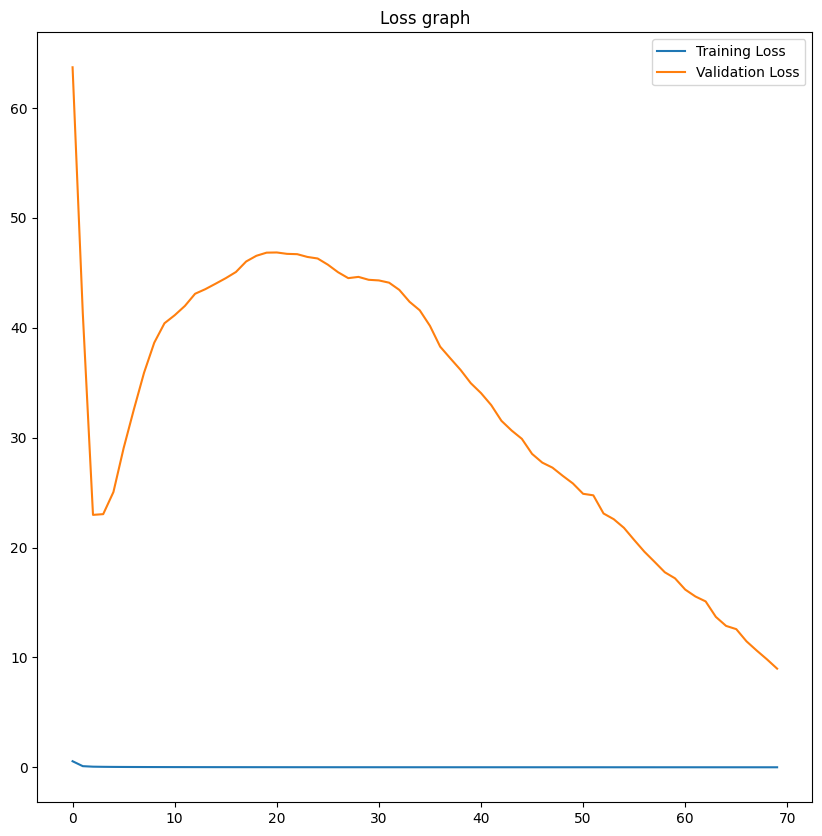

In [35]:
# Check training result
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history_32.epoch,history_32.history['loss'])
plt.plot(history_32.epoch,history_32.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss graph')
plt.show()

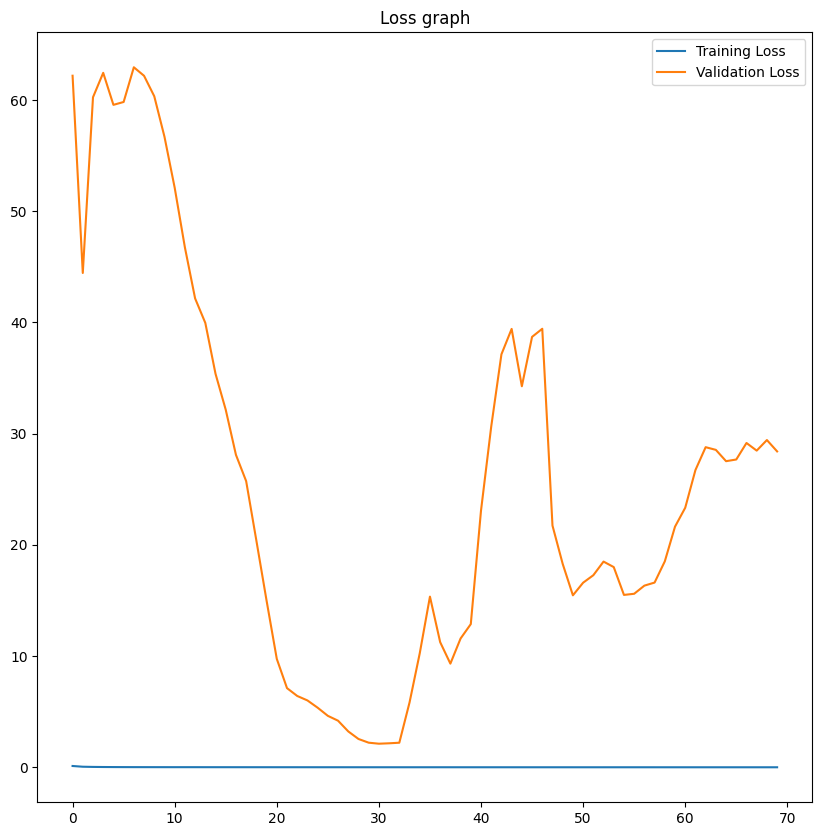

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history_64.epoch,history_64.history['loss'])
plt.plot(history_64.epoch,history_64.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss graph')
plt.show()

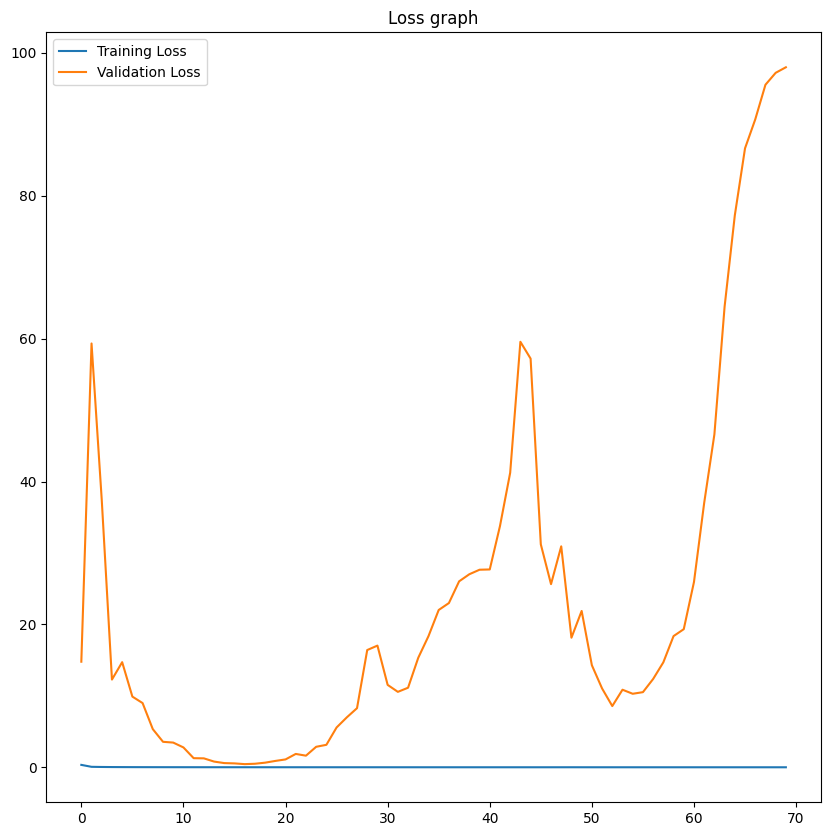

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history_128.epoch,history_128.history['loss'])
plt.plot(history_128.epoch,history_128.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss graph')
plt.show()

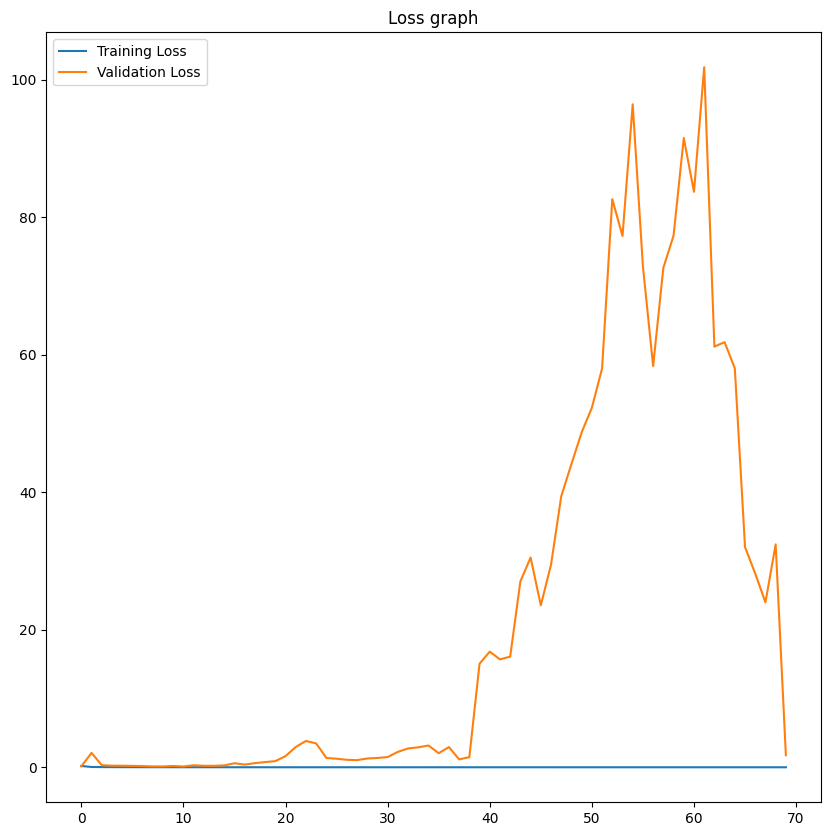

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.plot(history_256.epoch,history_256.history['loss'])
plt.plot(history_256.epoch,history_256.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.title('Loss graph')
plt.show()

In [39]:
model_load = mlflow.tensorflow.load_model(model_uri=f"models:/covid19_predictor/1")
type(model_load)

c:\ProgramData\anaconda3\envs\ypai10\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


keras.src.models.sequential.Sequential

In [41]:
predictions = model_load.predict(single_window.test)
predictions_squeezed = predictions.squeeze(axis=-1)  # Remove the last dimension
predictions_df = pd.DataFrame(predictions_squeezed)
print(predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
          0          1          2          3          4          5   \
0   0.696193  -1.910901  -3.563401  -4.380381 -10.349694 -17.022631   
1   2.442020  -1.839984   0.226468  -2.938931  -4.667437  -6.999536   
2   0.821377  -3.405291  -8.106605 -13.915277 -16.743778 -25.500336   
3   0.769745  -4.579369 -11.245237 -10.682638 -19.968916 -31.569075   
4   1.675078  -8.943836 -24.321644 -24.818733 -39.405773 -51.350647   
5   1.506408 -10.277170 -28.376038 -31.985851 -37.817917 -54.671700   
6   1.559031   0.219329  -2.958207  -3.573406  -5.272296  -6.468359   
7   2.022345 -12.241337 -37.587357 -33.437206 -42.749058 -54.413483   
8   2.418381  -0.521317  -2.173301   0.194531  -3.726273  -5.381767   
9   0.464647  -1.443126  -5.020205 -10.692928 -15.973661 -20.194887   
10  1.486594 -13.160805 -38.233299 -32.475586 -43.713745 -64.629501   
11  0.575455  -2.104729  -2.866794  -6.452506 -13.917025 -19.100996   
12  0.548108  -1.471058  -1.715321  -4

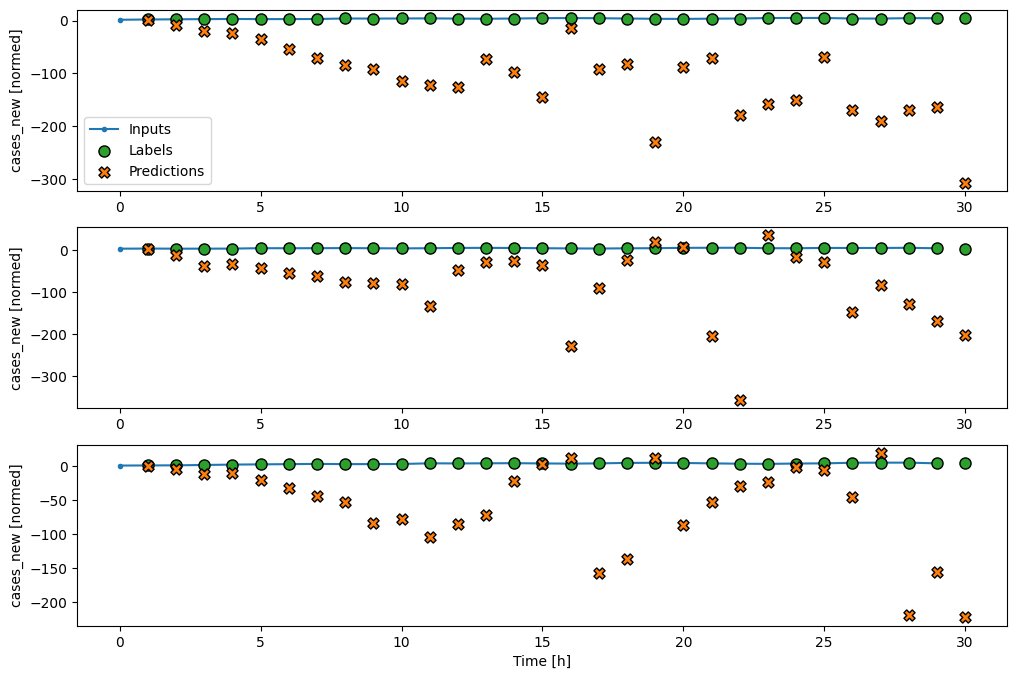

In [42]:
single_window.plot(plot_col='cases_new',model=model_load)